In [34]:
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath='/Users/DanLo1108/Downloads/'

train=pd.read_csv(filepath+'train.csv')

In [10]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [22]:
plt.plot(train.Age)

In [3]:
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),0.0%
Total size in memory,83.6 KiB
Average record size in memory,96.0 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


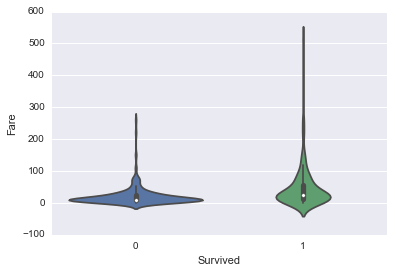

In [131]:
#Age, Fare

sns.violinplot(x="Survived", y="Fare", data=train)
#plt.ylim(0,100)

(0, 100)

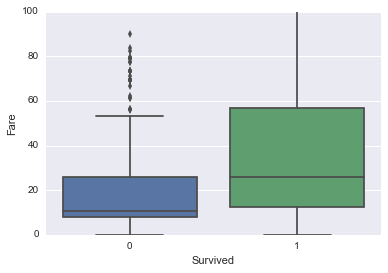

In [135]:
sns.boxplot(x="Survived", y="Fare", data=train)
plt.ylim(0,100)

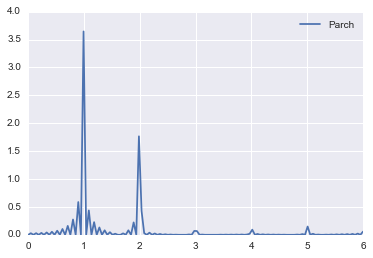

In [110]:
sns.kdeplot(train.Parch) #1.5
sns.kdeplot(train.SibSp)

In [46]:
def get_AgeGroup(x):
    if x.Age < 13:
        return 'Child'
    elif x.Age >= 13 and x.Age < 18:
        return 'Teen'
    elif x.Age >= 18 and x.Age < 28:
        return 'Young Adult'
    elif x.Age >= 28 and x.Age < 60:
        return 'Adult'
    elif x.Age >= 60:
        return 'Senior'
    
train['AgeGroup']=train.apply(lambda x: get_AgeGroup(x),axis=1)

In [ ]:
sns.barplot(x=pd.cut(train_df.Age, bins = [10, 20, 30, 50, 150], labels = ['0-10', '11-20', '21-30', '31-50']), y=train_df.Survived)

In [56]:
train['AgeGroup']=pd.cut(train.Age, bins = [0,13, 18, 28, 60, 150], labels = ['Child', 'Teen', 'Young Adult', 'Adult','Senior'],right=False)

In [55]:
train[['Age','AgeGroup','AgeGroup2']]

,Age,AgeGroup,AgeGroup2
0,22.0,Young Adult,Young Adult
1,38.0,Adult,Adult
2,26.0,Young Adult,Young Adult
3,35.0,Adult,Adult
4,35.0,Adult,Adult
5,NaN,None,NaN
6,54.0,Adult,Adult
7,2.0,Child,Child
8,27.0,Young Adult,Young Adult
9,14.0,Teen,Teen


In [62]:
train.groupby('Pclass',as_index=False).aggregate('mean')[['Pclass','Survived']]#Embarked,SibSp

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [57]:
train.groupby('Sex',as_index=False).aggregate('mean')[['Sex','Survived']]

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [74]:
train.fillna('0')

ValueError: fill value must be in categories

In [75]:
train['Cabin']=train[['Cabin']].fillna('No Cabin')

In [79]:
def get_cabin(x):
    if x.Cabin=='No Cabin':
        return 'No Cabin'
    else:
        return 'Cabin'
    
train['CabinType']=train.apply(lambda x: get_cabin(x),axis=1)

#train['CabinType']=get_cabin(train)

In [125]:
train['CabinTypeNum']=map(lambda x: int(x), train.CabinType=='Cabin')

In [80]:
train.groupby('CabinType').aggregate('mean')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
CabinType,,,,,,,
Cabin,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
No Cabin,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


In [66]:
train.groupby(['AgeGroup','Sex','Pclass'],as_index=False).aggregate('mean')[['AgeGroup','Sex','Pclass','Survived']].join(\
train.groupby(['AgeGroup','Sex','Pclass'],as_index=False).count()[['Embarked']])

,AgeGroup,Sex,Pclass,Survived,Embarked
0,Child,female,1,0.000000,1.0
1,Child,female,2,1.000000,8.0
2,Child,female,3,0.478261,23.0
3,Child,male,1,1.000000,3.0
4,Child,male,2,1.000000,9.0
5,Child,male,3,0.360000,25.0
6,Teen,female,1,1.000000,7.0
7,Teen,female,2,1.000000,4.0
8,Teen,female,3,0.666667,12.0
9,Teen,male,1,1.000000,1.0


In [40]:
pd.cut(train.Age, 10, labels=["1", "2", "3",'4','5','6','7','8','9','10'])

0        3
1        5
2        4
3        5
4        5
5      NaN
6        7
7        1
8        4
9        2
10       1
11       8
12       3
13       5
14       2
15       7
16       1
17     NaN
18       4
19     NaN
20       5
21       5
22       2
23       4
24       1
25       5
26     NaN
27       3
28     NaN
29     NaN
      ... 
861      3
862      6
863    NaN
864      3
865      6
866      4
867      4
868    NaN
869      1
870      4
871      6
872      5
873      6
874      4
875      2
876      3
877      3
878    NaN
879      7
880      4
881      5
882      3
883      4
884      4
885      5
886      4
887      3
888    NaN
889      4
890      4
Name: Age, Length: 891, dtype: category
Categories (10, object): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [32]:
train.groupby('Survived').aggregate('mean')

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [143]:
import sklearn

from sklearn.decomposition import PCA

train_norm=(train[['Fare','Pclass','CabinTypeNum']]-train[['Fare','Pclass','CabinTypeNum']].mean())/train[['Fare','Pclass','CabinTypeNum']].std()

In [90]:
pca=PCA(n_components=2)
train['FamilyPC']=map(lambda x: x[0], pca.fit_transform(train[['SibSp','Parch']]))
#pca.predict

In [145]:
pca=PCA(n_components=3)
train['CabinFarePC']=map(lambda x: x[0], pca.fit_transform(train_norm[['Fare','Pclass','CabinTypeNum']]))



In [146]:
train[['Fare','Pclass','CabinTypeNum','CabinFarePC']].sort_values('CabinFarePC',ascending=False)

,Fare,Pclass,CabinTypeNum,CabinFarePC
679,512.3292,1,1,7.130744
737,512.3292,1,1,7.130744
258,512.3292,1,0,5.723510
341,263.0000,1,1,4.487240
88,263.0000,1,1,4.487240
27,263.0000,1,1,4.487240
438,263.0000,1,1,4.487240
311,262.3750,1,1,4.480613
742,262.3750,1,1,4.480613
299,247.5208,1,1,4.323122


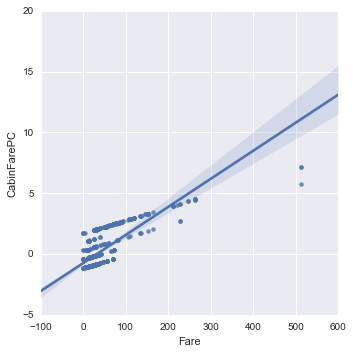

In [149]:
sns.lmplot('Fare','CabinFarePC',train)

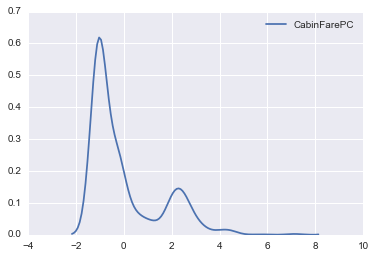

In [147]:
sns.kdeplot(train.CabinFarePC)

In [148]:
print(pca.explained_variance_ratio_)  

[ 0.72592171  0.18465864  0.08941965]


In [95]:
train.FamilyPC.mean()
#train.FamilyPC.std()

-4.832149146460558e-16

In [92]:
train[['SibSp','Parch','FamilyPC']].sort_values('FamilyPC',ascending=False)

,SibSp,Parch,FamilyPC
792,8,2,7.422052
863,8,2,7.422052
201,8,2,7.422052
324,8,2,7.422052
846,8,2,7.422052
159,8,2,7.422052
180,8,2,7.422052
59,5,2,4.731192
71,5,2,4.731192
386,5,2,4.731192


In [150]:
train.groupby('Survived',as_index=False).aggregate('mean')[['Survived','Fare','Pclass','CabinTypeNum','CabinFarePC']]

,Survived,Fare,Pclass,CabinTypeNum,CabinFarePC
0,0,22.117887,2.531876,0.123862,-0.417775
1,1,48.395408,1.950292,0.397661,0.670638


In [159]:
#np.corrcoef(train.Survived,train.Fare)
#np.corrcoef(train.Survived,train.Pclass)
#np.corrcoef(train.Survived,train.CabinTypeNum)
#np.corrcoef(train.Survived,train.CabinFarePC)

array([[ 1.        ,  0.25730652],
       [ 0.25730652,  1.        ]])

In [103]:
#np.corrcoef(train.Survived,train.SibSp)
#np.corrcoef(train.Survived,train.Parch)
np.corrcoef(train.Survived,train.FamilyPC)

array([[ 1.        , -0.00494544],
       [-0.00494544,  1.        ]])

In [108]:
train['FamilyPCGroups']=pd.cut(train.FamilyPC, bins = [-10,0,10], labels = ['No Family', 'Family'],right=False)

In [115]:
train.groupby('SibSp').aggregate('mean')

,PassengerId,Survived,Pclass,Age,Parch,Fare,FamilyPC
SibSp,,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028,-0.555655
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370,0.548942
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718,1.440304
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862,2.633324
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556,3.613176
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000,4.731192
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000,7.422052
